In [2]:
import cv2
import sys

img = cv2.imread("./OpenCV_Resources/images/starry_night.jpg")
if img is None:
    sys.exit("Could not read the image.")

height, width, channel = img.shape
print(height, width, channel)

cv2.imshow("Display window", img)
k = cv2.waitKey(0)

if k == ord("s"):
    cv2.imwrite("starry_night.png", img)

cv2.destroyAllWindows()

750 1050 3


In [3]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret, frame = cap.read()

    if not ret:
        print("Can't receive frame (steam end?). Exiting...")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow("frame", gray)
    if cv2.waitKey(1) == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

In [5]:
import numpy as np
import cv2

cap = cv2.VideoCapture("./OpenCV_Resources/videos/vtest.avi")

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("Can't receive frame (stream end?). Exiting... ")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow("frame", gray)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Can't receive frame (stream end?). Exiting... 


In [6]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('./OpenCV_Resources/videos/output.avi', fourcc, 20.0, (640, 480))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting... ")
    frame = cv2.flip(frame, 0)
    out.write(frame)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord("q"):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

In [9]:
import time
import cv2
import numpy as np

img = cv2.imread("./OpenCV_Resources/images/messi5.jpg")

e1 = time.perf_counter()
for i in range(5, 49, 2):
    img1 = cv2.medianBlur(img1, i)
e2 = time.perf_counter()

print((e2 - e1)/cv2.getTickFrequency())

3.88351479999983e-10


In [11]:
import cv2
import numpy as np

img = cv2.imread("./OpenCV_Resources/images/messi5.jpg")

e1 = cv2.getTickCount()
for i in range(5, 49, 2):
    img1 = cv2.medianBlur(img1, i)
e2 = cv2.getTickCount()

t = (e2 - e1) / cv2.getTickFrequency()
print(t)

0.377099077


In [12]:
import cv2

src = cv2.imread("./OpenCV_Resources/images/starry_night.jpg")
dst = cv2.flip(src, 0)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
import cv2

src = cv2.imread("./OpenCV_Resources/images/starry_night.jpg", cv2.IMREAD_COLOR)

height, width, channel = src.shape
matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
dst = cv2.warpAffine(src, matrix, (width, height))

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

영상의 기하학적 변환

In [15]:
img = cv2.imread("./OpenCV_Resources/images/messi5.jpg")
res1 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
height, width = img.shape[:2]
res2 = cv2.resize(img, (2*width, 2*height), interpolation=cv2.INTER_CUBIC)
cv2.imshow("img", img)
cv2.imshow("res1", res1)
cv2.imshow("res2", res2)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
img = cv2.imread("./OpenCV_Resources/images/messi5.jpg")

rows, cols = img.shape[:2]
M = np.float32([[1,0,100], [0,1,50]])
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('img', img)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
img = cv2.imread("./OpenCV_Resources/images/messi5.jpg")

M = cv2.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 90, 1)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('img', img)
cv2.imshow('M', M)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

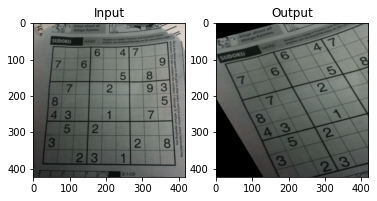

In [19]:
import matplotlib.pyplot as plt

img = cv2.imread("./OpenCV_Resources/images/sudoku.jpg")
rows, cols, ch = img.shape

pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img), plt.title("Input")
plt.subplot(122), plt.imshow(dst), plt.title("Output")
plt.show()

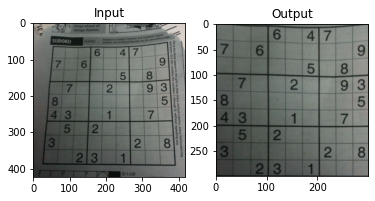

In [20]:
img = cv2.imread("./OpenCV_Resources/images/sudoku.jpg")
rows, cols, ch = img.shape

pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (300, 300))

plt.subplot(121), plt.imshow(img), plt.title("Input")
plt.subplot(122), plt.imshow(dst), plt.title("Output")
plt.show()

In [22]:
import cv2
import numpy as np

src = cv2.imread("./OpenCV_Resources/images/SuperMoon.png")
height, width = src.shape[:2]
map2, map1 = np.indices((height, width), dtype=np.float32)
map1 = map1 + width / 100 * np.sin(map1)
map2 = map2 + height / 100 * np.cos(map2)
dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()